In [1]:
try:
    import cPickle as pickle
except ImportError:  # Python 3.x
    import pickle
import os
import pandas as pd
import seaborn as sns
cur_path = 'summaries.p'


In [25]:
with open(cur_path, 'rb') as fp:
    data = pickle.load(fp)
if 'condition' in data:
	del data['condition']
for i in data.keys():
	if i=='condition':
		continue
	print(i,len(data[i]))
# del data['condition']
df = pd.DataFrame.from_dict(data, orient='columns')
df

accuracy_1 279
steps_1 279
batch_size 279
index 279
id 279
hidden_size 279
accuracy_forget 279
auc_forget 279
auc_1 279
steps_2 279
accuracy_2 279
tag 279
auc_2 279


,accuracy_1,steps_1,batch_size,index,id,hidden_size,accuracy_forget,auc_forget,auc_1,steps_2,accuracy_2,tag,auc_2
0,0.99818,12860,NaN,0,original,100,0.70207,0.614442,0.999988,11132,0.99725,None,0.999956
1,0.99829,12261,NaN,0,heterogeneous_constant,100,0.50157,0.353573,0.999943,7923,0.99778,None,0.999976
2,0.99752,11926,NaN,0,heterogeneous_dynamic_weights_relu6,100,0.69930,0.599207,0.999967,9940,0.99611,None,0.999897
3,0.99796,10950,NaN,0,original,100,0.67092,0.611447,0.999935,10674,0.99555,None,0.999882
4,0.99732,9915,NaN,0,heterogeneous_constant,100,0.49717,0.337708,0.999963,11383,0.99501,None,0.999833
...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,0.99758,10470,10.0,0,heterogeneous_constant,100,0.61709,0.577121,0.999973,8021,0.99343,gamma,0.999704
275,0.99838,8761,10.0,0,heterogeneous_dynamic_weights_relu6,100,0.61380,0.568298,0.999967,8845,0.99525,gamma,0.999833
276,0.99188,11509,10.0,0,original,100,0.62457,0.570302,0.999482,7372,0.99361,gamma,0.999423
277,0.99778,12261,10.0,0,heterogeneous_constant,100,0.60750,0.551977,0.999939,8365,0.99541,gamma,0.999581


In [36]:
# def create_id(x):
# 	print(x['tag'])
# 	return
# df = df[df['id'].notna()]
# df['id']=df[['id','tag']].apply(create_id)
def f(*cols):
    return "_".join([str(i) for i in cols])

df['u_id'] = df.apply(lambda x: f(x.id, x.tag,x.batch_size), axis=1)
df

,accuracy_1,steps_1,batch_size,index,id,hidden_size,accuracy_forget,auc_forget,auc_1,steps_2,accuracy_2,tag,auc_2,u_id
0,0.99818,12860,NaN,0,original,100,0.70207,0.614442,0.999988,11132,0.99725,None,0.999956,original_None_nan
1,0.99829,12261,NaN,0,heterogeneous_constant,100,0.50157,0.353573,0.999943,7923,0.99778,None,0.999976,heterogeneous_constant_None_nan
2,0.99752,11926,NaN,0,heterogeneous_dynamic_weights_relu6,100,0.69930,0.599207,0.999967,9940,0.99611,None,0.999897,heterogeneous_dynamic_weights_relu6_None_nan
3,0.99796,10950,NaN,0,original,100,0.67092,0.611447,0.999935,10674,0.99555,None,0.999882,original_None_nan
4,0.99732,9915,NaN,0,heterogeneous_constant,100,0.49717,0.337708,0.999963,11383,0.99501,None,0.999833,heterogeneous_constant_None_nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,0.99758,10470,10.0,0,heterogeneous_constant,100,0.61709,0.577121,0.999973,8021,0.99343,gamma,0.999704,heterogeneous_constant_gamma_10.0
275,0.99838,8761,10.0,0,heterogeneous_dynamic_weights_relu6,100,0.61380,0.568298,0.999967,8845,0.99525,gamma,0.999833,heterogeneous_dynamic_weights_relu6_gamma_10.0
276,0.99188,11509,10.0,0,original,100,0.62457,0.570302,0.999482,7372,0.99361,gamma,0.999423,original_gamma_10.0
277,0.99778,12261,10.0,0,heterogeneous_constant,100,0.60750,0.551977,0.999939,8365,0.99541,gamma,0.999581,heterogeneous_constant_gamma_10.0


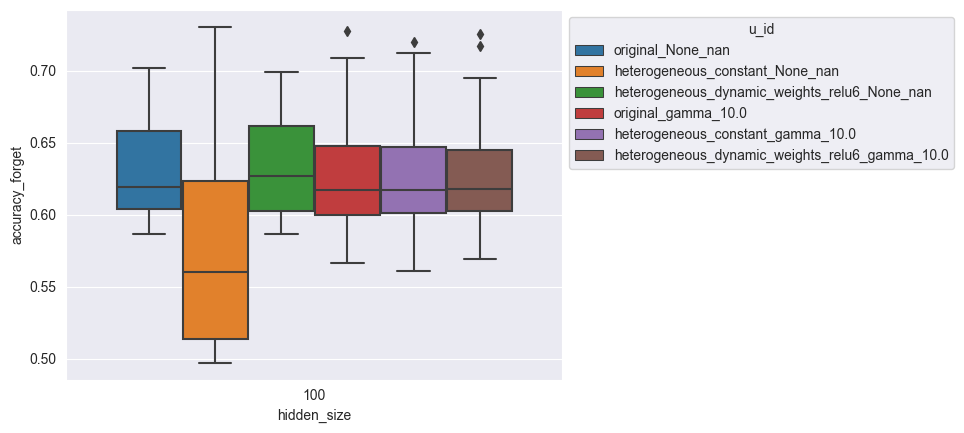

In [37]:

ax = sns.boxplot(df,x='hidden_size',y='accuracy_forget',hue='u_id')
sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1, 1))

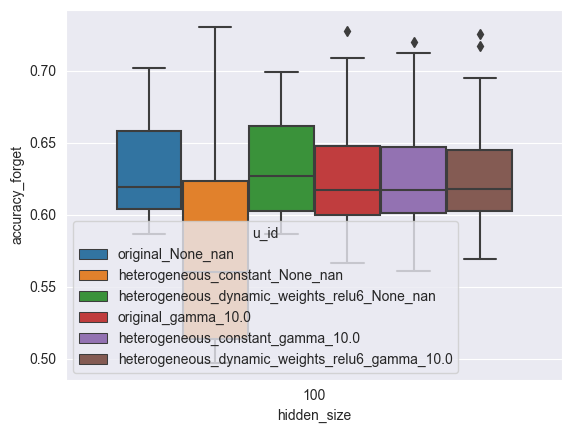

In [38]:
ax = sns.boxplot(df,x='hidden_size',y='accuracy_forget',hue='u_id')

<AxesSubplot: xlabel='hidden_size', ylabel='auc_forget'>

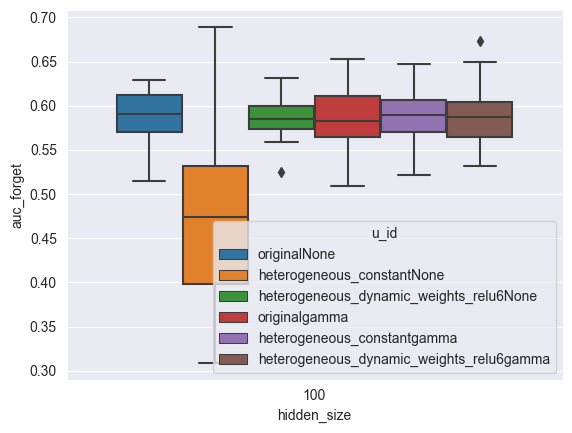

In [31]:
sns.boxplot(df,x='hidden_size',y='auc_forget',hue='u_id')

<AxesSubplot: xlabel='hidden_size', ylabel='steps_2'>

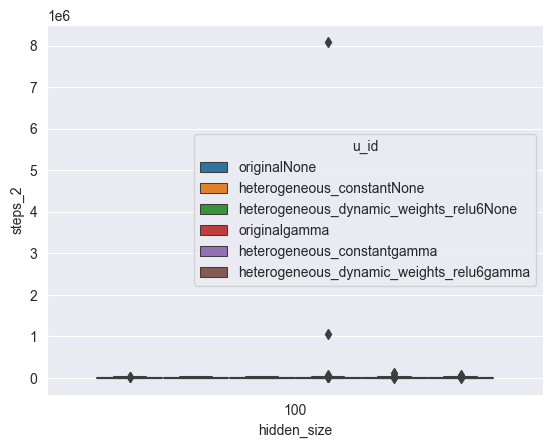

In [34]:
sns.boxplot(df,x='hidden_size',y='steps_2',hue='u_id')